## DBSCAN

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.cluster import DBSCAN

In [5]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [7]:
len(dbscan.core_sample_indices_)

810

In [9]:
dbscan.components_

array([[ 0.34923915,  0.9382516 ],
       [ 1.94469295,  0.13296285],
       [ 0.19779536,  1.04416609],
       ...,
       [-0.98897484,  0.08525476],
       [ 0.4469121 ,  0.86871954],
       [ 0.9021855 ,  0.44298871]])

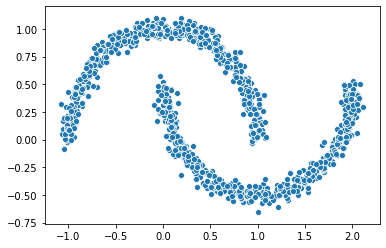

In [12]:
sns.scatterplot(x=X[:,0],y=X[:,1])

In [14]:
import numpy as np

In [16]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool) 
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

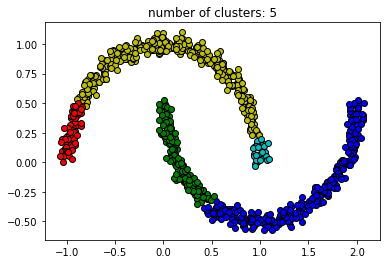

In [19]:
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r','c']
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X[class_member_mask & core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X[class_member_mask & ~core_samples_mask] 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 

In [21]:
# DBSCAN does not have predict

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [25]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

In [26]:
knn.predict(X_new)

array([3, 2, 4, 1])

In [27]:
knn.predict_proba(X_new)

array([[0.  , 0.  , 0.16, 0.84, 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.16, 0.34, 0.  , 0.  , 0.5 ],
       [0.  , 1.  , 0.  , 0.  , 0.  ]])

In [29]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  2,  4, -1])

## Gaussian Mixture Models GMM

In [30]:
from sklearn.mixture import GaussianMixture

In [49]:
gm = GaussianMixture(n_components=5, n_init=10)
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=10,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [42]:
gm.weights_

array([0.19584227, 0.61255064, 0.19160708])

In [43]:
gm.means_

array([[-0.75964144,  0.541243  ],
       [ 0.50787791,  0.24645649],
       [ 1.78023121, -0.02653484]])

In [44]:
gm.covariances_

array([[[ 0.04655276,  0.05780412],
        [ 0.05780412,  0.08492082]],

       [[ 0.18189441, -0.11687151],
        [-0.11687151,  0.29698875]],

       [[ 0.04349047,  0.05332344],
        [ 0.05332344,  0.08054781]]])

In [45]:
gm.converged_

True

In [46]:
gm.n_iter_

19

In [52]:
gm.predict(X)

array([2, 0, 2, 1, 3, 3, 1, 2, 3, 1, 3, 2, 0, 0, 4, 1, 3, 2, 1, 1, 3, 3,
       2, 1, 3, 0, 3, 4, 2, 3, 1, 0, 0, 3, 0, 2, 4, 4, 3, 3, 2, 3, 0, 3,
       2, 4, 0, 4, 3, 3, 2, 4, 4, 1, 3, 2, 1, 3, 3, 1, 0, 3, 2, 0, 1, 4,
       1, 4, 3, 0, 2, 1, 1, 2, 2, 4, 2, 2, 4, 2, 4, 3, 2, 0, 3, 0, 0, 0,
       1, 3, 2, 1, 3, 3, 2, 3, 2, 0, 0, 4, 3, 1, 1, 2, 2, 3, 1, 3, 1, 2,
       0, 0, 4, 2, 4, 3, 0, 0, 2, 3, 3, 1, 0, 3, 4, 4, 1, 1, 2, 3, 3, 4,
       4, 2, 0, 0, 3, 3, 2, 1, 3, 1, 2, 4, 0, 4, 0, 1, 3, 2, 3, 3, 1, 2,
       1, 4, 3, 1, 0, 0, 1, 0, 2, 3, 2, 0, 3, 2, 1, 1, 0, 3, 4, 2, 0, 2,
       0, 4, 0, 2, 1, 3, 4, 3, 1, 1, 0, 2, 3, 0, 0, 0, 3, 0, 4, 4, 3, 4,
       2, 2, 0, 3, 2, 3, 4, 3, 0, 1, 2, 2, 3, 4, 4, 4, 0, 3, 3, 1, 0, 1,
       2, 3, 1, 3, 3, 0, 0, 2, 2, 3, 1, 1, 4, 1, 4, 4, 3, 0, 2, 4, 1, 2,
       2, 1, 2, 2, 3, 3, 1, 4, 2, 1, 1, 1, 0, 1, 4, 0, 2, 4, 0, 0, 4, 1,
       1, 0, 3, 1, 1, 0, 1, 1, 2, 2, 2, 4, 0, 1, 3, 1, 4, 2, 3, 3, 4, 1,
       1, 2, 1, 4, 4, 4, 2, 3, 1, 1, 0, 3, 4, 3, 0,

In [51]:
gm.predict_proba(X)

array([[2.89308276e-137, 2.13580916e-007, 9.99999786e-001,
        2.58270387e-017, 4.99240063e-105],
       [1.00000000e+000, 4.62726656e-106, 3.79310424e-012,
        2.90097481e-226, 6.36888543e-034],
       [1.14714788e-167, 3.20142366e-004, 9.99679854e-001,
        3.40542400e-009, 2.68867490e-119],
       ...,
       [6.36971258e-266, 3.17555828e-041, 7.41086775e-063,
        1.00000000e+000, 1.43629788e-013],
       [4.01504912e-119, 7.39974576e-010, 9.99999999e-001,
        6.31688582e-024, 4.30822745e-096],
       [4.59680509e-046, 2.67436596e-024, 1.00000000e+000,
        2.74106646e-075, 4.09882755e-048]])

In [53]:
X_new, y_new = gm.sample(6)

In [54]:
X_new

array([[ 1.92307725,  0.03087498],
       [ 1.68603707, -0.12071805],
       [ 0.15230026, -0.01714365],
       [ 0.44869541,  0.83222896],
       [-0.52555082,  0.67775495],
       [ 0.73366533, -0.4871037 ]])

In [56]:
y_new

array([0, 0, 1, 2, 3, 4])

In [57]:
gm.score_samples(X)

array([-6.50864030e-01, -9.86131528e-02, -1.39174574e+00, -1.01288551e+00,
       -2.39153345e-01,  1.33663828e-02, -1.42908008e+00, -3.51050767e-01,
       -4.54205321e-01, -2.68542496e-01, -3.39163112e+00, -8.23698904e-01,
       -8.98684573e-01, -2.00593258e+00,  1.73695952e-01, -1.83748248e-01,
       -3.64507757e-01, -8.69598718e-02, -1.24075922e+00, -1.76848790e+00,
       -1.26707046e+00,  7.13854429e-02, -5.88398294e-02, -1.83679753e+00,
       -1.41959887e+00,  5.88568572e-02, -3.85887874e-01, -2.15191275e+00,
       -2.49089590e-01, -1.60411923e-01, -1.52487525e+00, -2.16565373e-01,
       -3.81343152e-01, -4.24273202e-01,  1.01594191e-01, -7.23457980e-01,
       -4.04463729e-02, -1.54433972e+00, -6.82686922e-01, -7.83721694e-01,
       -2.54814461e+00, -4.13256771e-01, -2.38953138e-02, -3.30457859e-01,
       -9.14972749e-01, -1.03152069e-01, -1.06580370e+00, -6.08867906e-01,
       -4.58635704e-01, -1.53333572e+00, -5.59608194e-01, -8.61973844e-01,
       -7.98087646e-01, -